In [3]:
import pandas as pd
import numpy as np
import py3Dmol

from biopandas.pdb import PandasPdb

In [99]:
def visualize(pdb_fp, view_args={'width': 400, 'height': 400}):
    with open(pdb_fp) as f:
        protein = ''.join([x for x in f])

    view = py3Dmol.view(**view_args)
    view.addModel(protein, 'pdb')
    view.setStyle({'chain': 'H'}, {'cartoon': {'color': 'cyan'}})
    view.setStyle({'chain': 'L'}, {'cartoon': {'color': 'magenta'}})
    view.zoomTo()

    view.spin({'x': 2, 'y': 1.5, 'z': 1}, 0.5)
    view.show()

In [119]:
pdb_fp = '6dc4.pdb'
visualize(pdb_fp, view_args={'width': 300, 'height': 300})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [103]:
df = PandasPdb().read_pdb(pdb_fp).df['ATOM']

In [324]:
from protstruc.pdb import ChothiaAntibodyPDB as cap

In [325]:
pdb = cap.read_pdb("6dc4.pdb", heavy_chain_id='H', light_chain_id='L', keep_fv_only=False)

chain_idx = pdb.get_chain_idx()
chain_ids = pdb.get_chain_ids()
seq_dict = pdb.get_seq_dict()

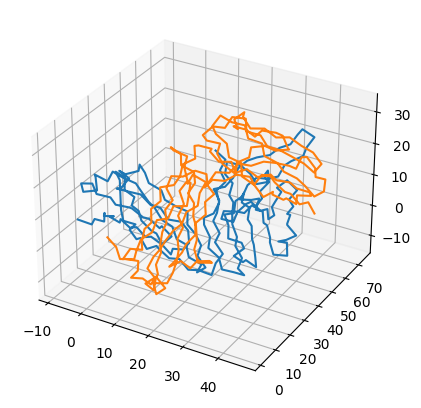

In [327]:
import matplotlib.pyplot as plt

pdb = cap.read_pdb("6dc4.pdb", heavy_chain_id='H', light_chain_id='L', keep_fv_only=False)
atom_xyz, atom_xyz_mask = pdb.get_atom_xyz()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

hmask = pdb.get_heavy_chain_mask()
lmask = pdb.get_light_chain_mask()

for m in [hmask, lmask]:
    ax.plot(
        atom_xyz[m, 1, 0],
        atom_xyz[m, 1, 1],
        atom_xyz[m, 1, 2]
    )